In [1]:
# based on https://yash-kukreja-98.medium.com/recognizing-handwritten-digits-in-real-life-images-using-cnn-3b48a9ae5e3

import os
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

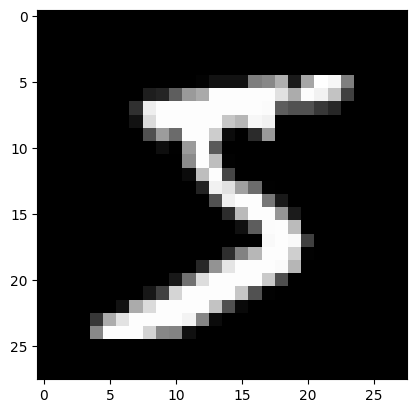

5
Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [2]:
# load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

In [3]:
# Reshaping the dataset
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))


Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [4]:
print(y_train[0])
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[0])


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
## Declare the model
model = Sequential()

# Configure checkpoint
checkpoint_path = "model/cp.weights.h5"
cp_callback = ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/Users/adam/code/github/tkdcpl/cnn-lcd-digits/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, callbacks=[cp_callback])
model.save('model/save_model.keras')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9139 - loss: 1.6009
Epoch 1: saving model to model/cp.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9140 - loss: 1.6002 - val_accuracy: 0.9696 - val_loss: 0.1049


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction (Softmax) from the neural network:

 [[9.9943048e-01 1.6601853e-09 3.8549337e-05 2.3892149e-11 1.2704738e-06
  1.7111350e-09 5.2643608e-04 2.3363609e-07 2.7879437e-06 2.2913837e-07]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




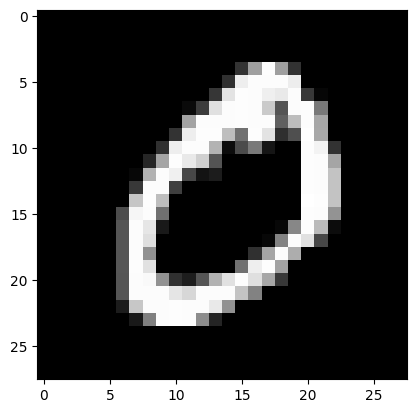



Final Output: 0


In [7]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
## Third output
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

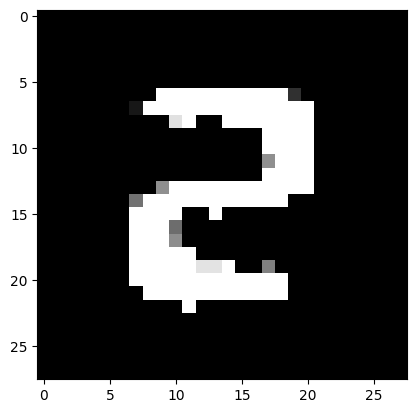

In [9]:
# now test on the LCD digit - the problematic one is number 6 which is recognized as 5

# prepare image
image = cv2.imread('./images/digit-2.png')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 186, 255, cv2.THRESH_BINARY_INV)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
resized_digit = cv2.resize(thresh.copy(), (18,18))
padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
plt.imshow(cv2.cvtColor(padded_digit, cv2.COLOR_BGR2RGB))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediction (Softmax) from the neural network:

 [[1.4133143e-08 1.3636938e-09 9.9995995e-01 1.9402585e-05 5.1089315e-09
  1.1609972e-10 4.4698641e-08 6.3611793e-08 2.0643898e-05 3.4148931e-10]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




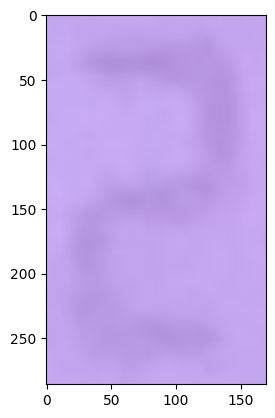



Predicted number is: 2


In [12]:
# predict digit
digit_prediction = model.predict(padded_digit.reshape(1, 28, 28, 1))
## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(digit_prediction))
## Second output
hard_maxed_digit_prediction = np.zeros(digit_prediction.shape)
hard_maxed_digit_prediction[0][np.argmax(digit_prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_digit_prediction))
## Third output
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(image)
plt.show()
print("\n\nPredicted number is: {}".format(np.argmax(digit_prediction)))
